# Ahmad Choreim
# Analyzing Headline News Impact on the Stock Market


In [1]:
# Import Required Modules for Pandas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import Required Modules for NLP:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as stm
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
#Import Required Modules for Linear Regression:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#Import Required Modules for Logistic Regression:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report as report

## Data Loading and Preprocessing:

### Loading stock_n_hl_news.csv into DataFrame df.

In [6]:
#Use ps.read_csv to read csv
df = pd.read_csv("stock_n_hl_news.csv")

#print head to show work:
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...


### Converting 'Date' column to datetime format.

In [7]:
#Convert Date column to pandas dateTime object
df['Date'] = pd.to_datetime(df['Date'])

#Show correct conversion:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      483 non-null    datetime64[ns]
 1   AAPL      483 non-null    float64       
 2   NASDAQ    483 non-null    float64       
 3   NYA       483 non-null    float64       
 4   SP500     483 non-null    float64       
 5   DJI       483 non-null    float64       
 6   Headline  483 non-null    object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 26.5+ KB


In [8]:
#Check if there are any NAN values to drop
df.isna().sum()

Date        0
AAPL        0
NASDAQ      0
NYA         0
SP500       0
DJI         0
Headline    0
dtype: int64

## Market Trend Column:

### In the dataframe, creating a column 'Trend'.

In [9]:
#Create Column "Trend"
df["Trend"] = None

#Showing correct creation of column "Trend":
print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      483 non-null    datetime64[ns]
 1   AAPL      483 non-null    float64       
 2   NASDAQ    483 non-null    float64       
 3   NYA       483 non-null    float64       
 4   SP500     483 non-null    float64       
 5   DJI       483 non-null    float64       
 6   Headline  483 non-null    object        
 7   Trend     0 non-null      object        
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 30.3+ KB
None


,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,None
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,None
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,None
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,None
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,None


### Labeling 'Trend' as 'Bullish' if NASDAQ index is higher than the previous day, 'Bearish' otherwise. Assume 'Bullish' for the first date in the dataset.


In [10]:
#Label first row for 'Trend' column to 'Bullish'
df.loc[0, 'Trend'] = 'Bullish'

#Showing the new column's first row is labeled as: "Bullish"
df.head()

,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,None
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,None
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,None
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,None


In [11]:
#Iterate through Trend, and labeling it as 'Bullish' or 'Bearish' depending on NASDAQ index:

#Iterate through df
for i in range(1, len(df)):
    #If NASDAQ is greater than day before label as "Bullish"
    if df.loc[i, "NASDAQ"] > df.loc[i-1, "NASDAQ"]:
        df.loc[i, "Trend"] = "Bullish"
    #Else: "Bearish"
    else:
        df.loc[i, "Trend"] = "Bearish"


In [12]:
#Showing that the Code is implemented correctly:
df['Trend']

0      Bullish
1      Bearish
2      Bearish
3      Bullish
4      Bearish
        ...   
478    Bearish
479    Bullish
480    Bullish
481    Bearish
482    Bullish
Name: Trend, Length: 483, dtype: object

## Sentiment Analysis:

### Performing NLP analysis on 'Headline' to obtain compound sentiment scores.

In [ ]:
"""
To Perform NLP analysis on 'Headline,' I will break it down into
the following steps:

1. Create a column named 'StmScore'

2. Iterate through 'Headline' and at every iteration:
   a. Perform the NLP analysis on the 'Headline' column
   b. store outcome into the 'StmScore' column
"""

In [13]:
"""
1. Create a column named 'StmScore', and one named 'Sentiment'
"""

#Creating 'StmScore' Column:
df["StmScore"] = None

#Creating 'Sentiment' Column:
df["Sentiment"] = None

#Showing that column has been created:
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483 entries, 0 to 482
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       483 non-null    datetime64[ns]
 1   AAPL       483 non-null    float64       
 2   NASDAQ     483 non-null    float64       
 3   NYA        483 non-null    float64       
 4   SP500      483 non-null    float64       
 5   DJI        483 non-null    float64       
 6   Headline   483 non-null    object        
 7   Trend      483 non-null    object        
 8   StmScore   0 non-null      object        
 9   Sentiment  0 non-null      object        
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 37.9+ KB
None


,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,None,None
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,None,None
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,None,None
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,None,None
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,None,None


### Storing scores in 'StmScore'. Categorize as 'positive' (>0.7), 'neutral' (-0.7 to 0.7), 'negative' (<-0.7) in 'Sentiment'.

In [14]:
"""
2. Iterate through 'Headline' and at every iteration:
   a. Perform the NLP analysis on the 'Headline' column
   b. store outcome into the 'StmScore' and 'Sentiment' columns
"""

#Iterate through the df
for i in range(0, len(df)):
    #Store 'Headline' into mystr variable
    mystr = df.loc[i, 'Headline']
    #Perform stmScore 
    stmscore = stm().polarity_scores(mystr)
    
    #Categorize scores as as 'positive' (>0.7), 'neutral'
    #(-0.7 to 0.7), 'negative' (<-0.7) in 'Sentiment'.
    if stmscore['compound'] > 0.7:
        category = "positive"
    elif stmscore['compound'] < -0.7:
        category = "negative"
    else:
        category = "neutral"

    # Store compound score in 'StmScore' and category in 'Sentiment'
    df.loc[i, 'StmScore'] = stmscore['compound']
    df.loc[i, 'Sentiment'] = category



In [15]:
#Showing Correct Implementation:
print("StmScore: \n" , df.StmScore)
print("\nSentiment: \n" , df.Sentiment)
df.head()

StmScore: 
 0       -0.98
1      -0.976
2      -0.533
3      0.7579
4      0.0065
        ...  
478    0.9936
479   -0.9522
480    0.9985
481     0.978
482   -0.9631
Name: StmScore, Length: 483, dtype: object

Sentiment: 
 0      negative
1      negative
2       neutral
3      positive
4       neutral
         ...   
478    positive
479    negative
480    positive
481    positive
482    negative
Name: Sentiment, Length: 483, dtype: object


,Date,AAPL,NASDAQ,NYA,SP500,DJI,Headline,Trend,StmScore,Sentiment
0,2017-12-18,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,France saves Marquis de Sade’s 120 Days of Sod...,Bullish,-0.98,negative
1,2017-12-19,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,House prices to fall in London and south-east ...,Bearish,-0.976,negative
2,2017-12-20,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,Hedge funds fail to stop 'billion-dollar brain...,Bearish,-0.533,neutral
3,2017-12-21,41.320255,6965.359863,12800.20020,2684.570068,24782.30078,Guardian Brexit watch \n\n\n Brexit helped p...,Bullish,0.7579,positive
4,2017-12-22,41.320255,6959.959961,12797.40039,2683.340088,24754.09961,Jim Cramer broke down why owning fewer stocks ...,Bearish,0.0065,neutral


## Linear Regression Analysis:

### Analyzing the relationship between AAPL stock prices and 'StmScore'.

In [ ]:
"""
To analyze the relationship between AAPL stock prices and 'StmScore',
I will do the following:

1. Seperate the independent variables X from the dependent variables Y.
2. Generate a random sampling of training and testing data.
3. Apply the linear regression model.
4. Interpret the results in a markdown cell.
"""

In [112]:
"""
1. Seperate the independent variables X from the dependent variables Y.

The independent variable 'x' is the StmScore column
The dependent variable 'y' is the AAPL stock price column
"""

#Seperate the independent variable into its own dataframe:
x = df[["StmScore"]]

#Printing x to show correctness
x

,StmScore
0,-0.98
1,-0.976
2,-0.533
3,0.7579
4,0.0065
...,...
478,0.9936
479,-0.9522
480,0.9985
481,0.978


In [113]:
#Seperate the dependent variable from the rest of the datagrame
y = df.AAPL

#Printing y to show correctness:
y

0      41.653164
1      41.209293
2      41.164425
3      41.320255
4      41.320255
         ...    
478    93.371246
479    94.916397
480    95.569176
481    94.393204
482    94.202499
Name: AAPL, Length: 483, dtype: float64

In [114]:
"""
2. Generate a random sampling of training and testing data.
"""

#Use the train_test_split module to split the data into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [115]:
print("x_train: \n" , x_train)
print("\n y_train: ]n" , y_train)

x_train: 
     StmScore
365  -0.9144
78    0.9871
310   0.8784
204  -0.7238
289   0.9161
..       ...
255   0.6931
72     0.875
396  -0.8028
235  -0.9887
37   -0.9772

[386 rows x 1 columns]

 y_train: ]n 365    77.004913
78     41.680744
310    45.980900
204    53.042904
289    41.403278
         ...    
255    37.420872
72     39.916985
396    70.472717
235    41.756084
37     39.677547
Name: AAPL, Length: 386, dtype: float64


### Applying linear regression; assess if sentiment scores predict AAPL prices.

In [116]:
"""
3. Apply the linear regression model.
"""

#Select the LinearRegression model and fit it to the trainging data:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [117]:
#Showing the y_predict model prediction on the x_test sample:
y_predict = model.predict(x_test)
y_predict

array([53.93396236, 50.13558187, 50.12146477, 50.13028796, 50.10734768,
       50.13881703, 55.98152914, 55.98094093, 50.10999463, 55.98182325,
       55.97976451, 51.19436389, 50.11028874, 50.12411173, 50.11646497,
       50.11087695, 55.98329378, 55.98623484, 50.21528462, 55.73359769,
       50.10793589, 55.95358906, 50.3776312 , 50.12411173, 50.18234474,
       55.70683403, 55.98623484, 55.9603535 , 50.10764178, 55.97799987,
       55.96211814, 50.29175221, 53.0272332 , 50.12911153, 50.54527169,
       55.96858847, 55.88006253, 50.12940564, 55.95623602, 55.9747647 ,
       55.97917629, 54.21042211, 55.34390708, 55.98123504, 51.07995661,
       55.04862454, 50.12352352, 53.0463501 , 55.97123543, 50.12146477,
       55.96300046, 55.9124142 , 50.18940329, 55.96741205, 55.10244596,
       50.30998679, 50.24587166, 55.72212755, 50.14087578, 55.85035781,
       55.66948255, 53.49192087, 50.12146477, 55.94329535, 55.97917629,
       50.12469994, 50.11881782, 55.98094093, 55.89623837, 50.10

In [ ]:
#Printing out the training data score:
model.score(x_train, y_train)

0.03208357728065492

In [119]:
#Printing out modelScore:
model.score(x_test,y_test)

-0.013581035573835276

In [ ]:
#Printing out coefficient:
model.coef_

array([-2.94106116])

In [ ]:
#Printing out intercept:
model.intercept_

np.float64(53.04635010019986)

In [ ]:
#I am also running an ols regression model for more data anlyzation:
Results = ols("AAPL ~ StmScore", data=df).fit()
print (Results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     1.066
Date:                Thu, 05 Dec 2024   Prob (F-statistic):              0.352
Time:                        01:19:28   Log-Likelihood:                -1616.5
No. Observations:                 483   AIC:                             3985.
Df Residuals:                     107   BIC:                             5557.
Df Model:                         375                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              55.8944    

### Interpreting the results:

#### Training and Testing Model Results:

* The model’s R-squared score on the test set was -0.0136. This indicates that the model failed to caputure a relationship between the independent variable x (StmScore) and y (APPL stock price)
* The coefficient value is -2.94106116. The negative coefficient (also known as the slope) indicated that there may be an inverse relationship netween the sentiment scores and the AAPLe stock price, but the poor r-squared value refutes this.
* The intercept value is 53.04635010019986, which represents the predicted AAPL share price when the StmScoree is 0.

#### OLS Model Results:

* When running the OLS Model to compare against the training and Testing results. we can see that the r-squared values returned was: 0.789. This indicates that 78.9% of the variability in the AAPL price can be explained by the StmScore. However the adjusted_r_squared value was much lower at: 0.049, which indicates that the model does not actually perform well. 
* In the ols model we also recieved an intercept p-value of 0.00, which indicates that intercept value is not significantly different from zero.

## Logistic Regression for Trend Prediction:

### Predicting 'Trend' based on 'StmScore'.

In [ ]:
"""
To Predict 'Trend' based on 'StmScore'.,
I will do the following:

1. Seperate the independent variables X from the dependent variables Y.
2. Generate a random sampling of training and testing data.
3. Apply the Logistic regression model.
4. Interpret the results in a markdown cell.
"""

### Applying logistic regression; split data into training and testing sets.

In [120]:
"""
1. Seperate the independent variables X from the dependent variables Y.

The Independent Variable X is the 'StmScore'
The Dependent variabe Y is the 'Trend'
"""

#Assigning the independent variable "StmScore" to x
x = df[["StmScore"]]
#Printing x to show correctness:
x

,StmScore
0,-0.98
1,-0.976
2,-0.533
3,0.7579
4,0.0065
...,...
478,0.9936
479,-0.9522
480,0.9985
481,0.978


In [ ]:
# To perform a Logistic regression using 'Trend' as the dependent variable
# I must turn it into dummy variables of 0's and 1's, to do so i will use python map:

# Create a new DataFrame and add the mapped dummy variable for 'Trend'
newDF = pd.DataFrame()
newDF['Trend'] = df["Trend"].map({'Bullish': 0, 'Bearish': 1})

#Assigning the dependent variable 'Trend' to Y
y = newDF.Trend
#Printing to show correctness:
y

0      0
1      1
2      1
3      0
4      1
      ..
478    1
479    0
480    0
481    1
482    0
Name: Trend, Length: 483, dtype: int64

In [122]:
"""
2. Generate a random sampling of training and testing data.
"""

#Use the train_test_split module to sperate data into trainging and testing samples:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state=54)

In [123]:
#Printing to show correctness:
print("x_train: \n" , x_train)
print("\n y_train: ]n" , y_train)

x_train: 
     StmScore
269   0.9936
479  -0.9522
327   0.9886
220   0.9976
134   0.9976
..       ...
23   -0.7691
271  -0.9756
386   0.9634
325  -0.9836
111  -0.9975

[386 rows x 1 columns]

 y_train: ]n 269    0
479    0
327    1
220    1
134    0
      ..
23     1
271    0
386    1
325    0
111    0
Name: Trend, Length: 386, dtype: int64


In [124]:
"""
3. Apply the Logistic regression model.
"""

#Select logistic regression model and fit the data to the x_train and y_train
logmodel = LogisticRegression()
logmodel.fit(x_train,y_train)


LogisticRegression()

In [125]:
#Show x_test
x_test

,StmScore
296,0.9912
112,-0.9783
317,-0.9924
341,0.9754
233,-0.9894
...,...
343,-0.9987
87,0.9959
354,-0.9951
150,0.9585


In [126]:
#Perform y_prediction using x_test:
y_predict=logmodel.predict(x_test)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [134]:
y.value_counts()

print(275/(275+208))

0.5693581780538303


In [127]:
#Scoring the model:
logmodel.score(x_test, y_test)  # number of correct predictions / total number of predictions

0.5979381443298969

In [109]:
print(report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75        58
           1       0.00      0.00      0.00        39

    accuracy                           0.60        97
   macro avg       0.30      0.50      0.37        97
weighted avg       0.36      0.60      0.45        97



/Users/ahmadchoreim/Local-Documents/Harvard University/CSCI E-101/Projects/PSET9/9env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ahmadchoreim/Local-Documents/Harvard University/CSCI E-101/Projects/PSET9/9env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ahmadchoreim/Local-Documents/Harvard University/CSCI E-101/Projects/PSET9/9env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being s

### Discussing model performance and key takeaways:

#### Bullish Class Prediction:

* Precision: The precision for the Bullish class indicated by the dummy variable (0) is 0.60 which means that the Model Predicts Bullish trend correctly 60% of the time.
* Recall: The Recall for the Bullish class Model is 1.00 which indicates that the model correctly predicted all actual bullish instances.
* F1-Score: Combining the Recall and Precision scores yields an f1-score of 0.75, this indicates that the model performs somewhat decently for the Bullish class

#### Bearish Class Prediction:

* The precision for the Bearish class indicated by the dummy variable (1) is 0.00 which means that the Model predicts Bearish trent correctly 0% of the time.
* The recall for the Bearish class model is 0.00, which indicates that the model incorrectly predicted all the bearish instances
* F1-Score: Combining the Recall and Precision scores yields an f1-score of 0.00, this indicates that the model absolutely fails for the Bearish class.

#### Overall Analysis
* The model heavily favors the Bullish Class, which results in a decent precision for the Bullish class, but leaves a very poor performance in predictions for the Bearish class.
* Overall it seeems that the model only predicts the outcome to be Bullish at all times. This would explain why the model score was very innaccurate, and the precision for correct Bearish results aree 0% correct. 

# Advanced EDA:

## Descriptive Statistics:

### Computing summary statistics (mean, median, standard deviation) for key columns (AAPL, NASDAQ, NYA, SP500, DJI, sentiment scores).

Mean, Median, and Standard Dev for the APPL column:

APPL Mean: 52.481323336977226
APPL Median: 45.65152359
APPL Standard Deviation: 14.975847743323314


Outliers:  [86.2640686, 86.07826233, 85.95845795, 85.99269104, 87.73832703, 89.6110611, 88.02924347, 89.19789124, 86.4571991, 88.4497757, 89.18810272, 89.01940918, 91.40068054, 91.11711121, 93.23922729, 93.6401825, 93.8039856, 93.37124634, 94.91639709, 95.56917572, 94.39320374, 94.20249939]


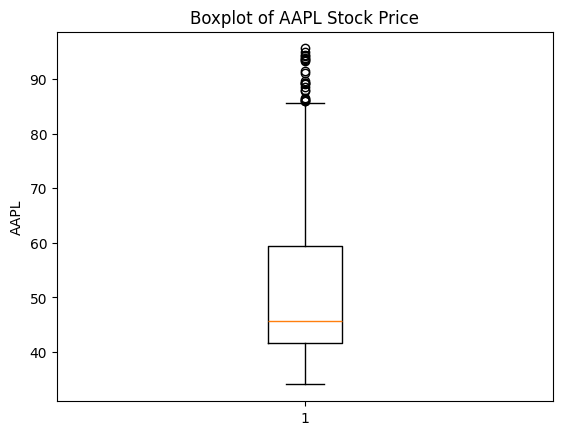

In [ ]:
# Mean, Median, and Standard Dev for the APPL column:

print("Mean, Median, and Standard Dev for the APPL column:\n")
print("APPL Mean:" , df["AAPL"].mean())
print("APPL Median:" , df["AAPL"].median())
print("APPL Standard Deviation:" , df["AAPL"].std())


# Identify Outliers Using the IQR Method:
data = df["AAPL"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of AAPL Stock Price')
plt.ylabel('AAPL')
plt.show()

Mean, Median, and Standard Dev for the NASDAQ column:

NASDAQ Mean: 7868.327406227744
NASDAQ Median: 7628.279785
NASDAQ Standard Deviation: 900.399859728585


Outliers:  [9203.429688, 9273.929688, 9388.94043, 9370.80957, 9383.769531, 9402.480469, 9314.910156, 9269.679688, 9275.160156, 9298.929688, 9273.400391, 9467.969727, 9508.679688, 9572.150391, 9520.509766, 9628.389648, 9638.94043, 9725.959961, 9711.969727, 9731.179688, 9732.740234, 9817.179688, 9750.969727, 9576.589844, 9221.280273, 9192.339844, 9234.830078, 9375.780273, 9284.879883, 9340.219727, 9412.360352, 9368.990234, 9489.870117, 9552.049805, 9682.910156, 9615.80957, 9924.75, 9953.75, 10020.34961, 9492.730469, 9588.80957, 9726.019531, 9895.870117, 9910.530273, 9943.049805, 9946.120117, 10056.48047, 10131.37012, 9909.169922, 10017.0, 9757.219727, 9874.150391, 10058.76953, 10154.62988, 10433.65039, 10343.88965, 10492.5, 10547.75, 10617.44043, 10390.83984, 10488.58008, 10550.49023, 10473.83008, 10503.19043]


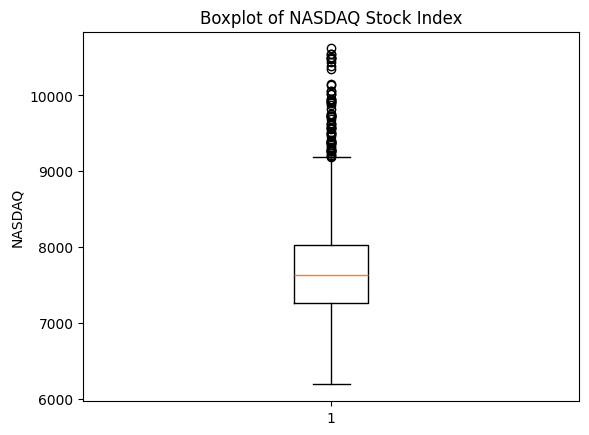

In [147]:
# Mean, Median, and Standard Dev for the NASDAQ column:

print("Mean, Median, and Standard Dev for the NASDAQ column:\n")
print("NASDAQ Mean:" , df["NASDAQ"].mean())
print("NASDAQ Median:" , df["NASDAQ"].median())
print("NASDAQ Standard Deviation:" , df["NASDAQ"].std())

# Identify Outliers Using the IQR Method:
data = df["NASDAQ"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of NASDAQ Stock Index')
plt.ylabel('NASDAQ')
plt.show()

Mean, Median, and Standard Dev for the NYA column:

NYA Mean: 12464.099698434782
NYA Median: 12622.09961
NYA Standard Deviation: 838.9965215126282


Outliers:  [11036.7998, 10769.7998, 13997.7002, 14042.59961, 14183.2002, 14110.0, 14110.2002, 14102.0, 14024.90039, 14035.0, 14054.09961, 14137.0, 14099.0, 14097.2998, 14039.0, 14087.09961, 14061.5, 10060.7998, 10852.0, 9567.530273, 10063.40039, 9384.599609, 9461.299805, 9133.160156, 8777.379883, 9658.320313, 9961.379883, 10536.2998, 10187.2002, 10434.7002, 10301.90039, 9844.849609, 10062.40039, 9880.629883, 10515.2002, 10537.0, 10902.59961, 10949.5, 10843.90039, 10818.0, 11003.90039, 10706.40039, 10908.59961, 10916.7002, 11017.90039, 11058.59961, 11056.2998, 11000.0, 11055.59961, 10829.40039, 10927.40039, 10947.2998]


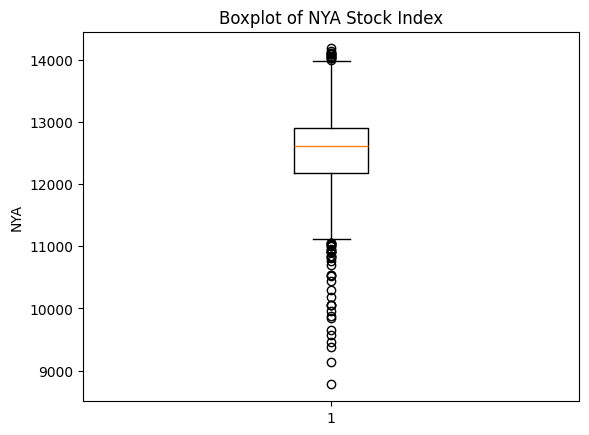

In [ ]:
# Mean, Median, and Standard Dev for the NYA column:

print("Mean, Median, and Standard Dev for the NYA column:\n")
print("NYA Mean:" , df["NYA"].mean())
print("NYA Median:" , df["NYA"].median())
print("NYA Standard Deviation:" , df["NYA"].std())

# Identify Outliers Using the IQR Method:
data = df["NYA"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of NYA Stock Index')
plt.ylabel('NYA')
plt.show()

Mean, Median, and Standard Dev for the SP500 column:

SP500 Mean: 2819.119480302277
SP500 Median: 2786.570068
SP500 Standard Deviation: 198.40357355493128


Outliers:  [2416.620117, 2351.100098, 3234.850098, 3246.280029, 3237.179932, 3253.050049, 3274.699951, 3265.350098, 3288.129883, 3329.620117, 3320.790039, 3321.75, 3325.540039, 3295.469971, 3243.629883, 3276.23999, 3273.399902, 3283.659912, 3225.52002, 3248.919922, 3297.590088, 3334.689941, 3345.780029, 3327.709961, 3352.090088, 3357.75, 3379.449951, 3373.939941, 3380.159912, 3370.290039, 3386.149902, 3373.22998, 3337.75, 3225.889893, 2386.129883, 2398.100098, 2409.389893, 2304.919922, 2237.399902, 3232.389893, 3207.179932, 3190.139893, 3179.719971, 3169.939941, 3185.040039, 3197.52002, 3226.560059, 3215.570068, 3224.72998]


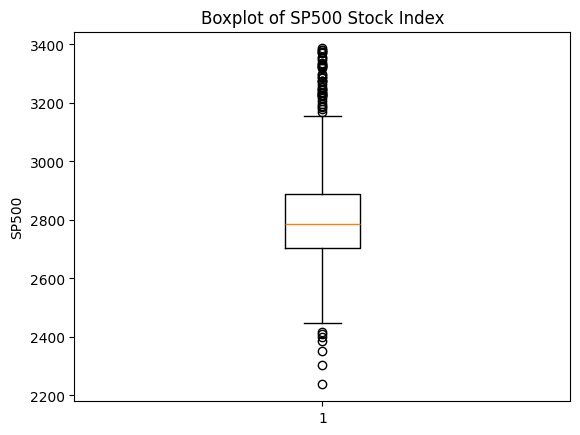

In [149]:
# Mean, Median, and Standard Dev for the SP500 column:

print("Mean, Median, and Standard Dev for the SP500 column:\n")
print("SP500 Mean:" , df["SP500"].mean())
print("SP500 Median:" , df["SP500"].median())
print("SP500 Standard Deviation:" , df["SP500"].std())

# Identify Outliers Using the IQR Method:
data = df["SP500"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of SP500 Stock Index')
plt.ylabel('SP500')
plt.show()

Mean, Median, and Standard Dev for the DJI column:

DJI Mean: 25261.111627308488
DJI Median: 25283.0
DJI Standard Deviation: 1547.3737667039113


Outliers:  [21792.19922, 28634.90039, 28703.40039, 28583.69922, 28745.09961, 28956.90039, 28823.80078, 28907.09961, 29348.09961, 29196.0, 29186.30078, 29160.09961, 28989.69922, 28535.80078, 28722.80078, 28734.40039, 28859.40039, 28256.0, 28399.80078, 28807.59961, 29290.90039, 29379.80078, 29102.5, 29276.80078, 29276.30078, 29551.40039, 29423.30078, 29398.09961, 29232.19922, 29348.0, 29220.0, 28992.40039, 21200.59961, 20188.5, 21237.40039, 19898.90039, 20087.19922, 19174.0, 18591.90039, 20704.90039, 21200.59961, 21636.80078, 22327.5, 21917.19922, 20943.5, 21413.40039, 21052.5]


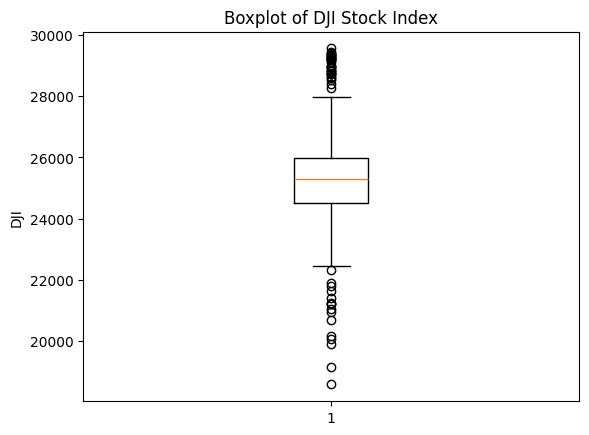

In [150]:
# Mean, Median, and Standard Dev for the DJI column:

print("Mean, Median, and Standard Dev for the DJI column:\n")
print("DJI Mean:" , df["DJI"].mean())
print("DJI Median:" , df["DJI"].median())
print("DJI Standard Deviation:" , df["DJI"].std())

# Identify Outliers Using the IQR Method:
data = df["DJI"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of DJI Stock Index')
plt.ylabel('DJI')
plt.show()

Mean, Median, and Standard Dev for the StmScore column:

StmScore Mean: 0.06575196687370603
StmScore Median: 0.6349
StmScore Standard Deviation: 0.9269002854578307


Outliers:  []


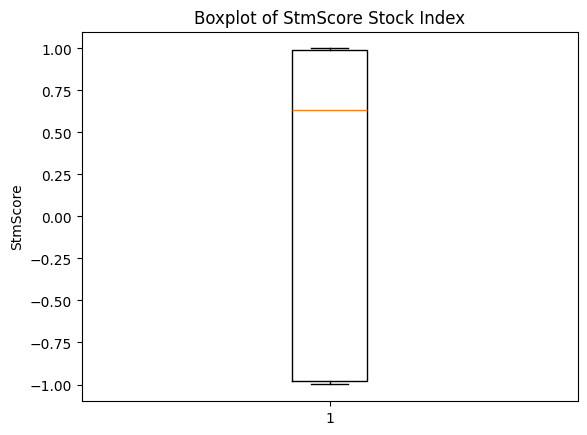

In [151]:
# Mean, Median, and Standard Dev for the StmScore column:

print("Mean, Median, and Standard Dev for the StmScore column:\n")
print("StmScore Mean:" , df["StmScore"].mean())
print("StmScore Median:" , df["StmScore"].median())
print("StmScore Standard Deviation:" , df["StmScore"].std())

# Identify Outliers Using the IQR Method:
data = df["StmScore"]

# Calculate quartiles
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate lower and upper fences
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Find outliers
outliers = [x for x in data if x < lower_fence or x > upper_fence]

print("\n\nOutliers: " , outliers)

# Create a boxplot to visualize the outliers:
plt.boxplot(data, showfliers=True)
plt.title('Boxplot of StmScore Stock Index')
plt.ylabel('StmScore')
plt.show()

### Summary: Explaining observations of outliers or anomalies.

### AAPL
* Mean and Median: The mean (52.48) is significantly higher than the median (45.65). This suggests that the data might be skewed to the right, with a few high values pulling the mean upwards.

* Standard Deviation: The standard deviation (14.98) indicates that the data points are spread out quite significantly from the mean.

* Outliers: The outliers are significantly higher than the majority of the data points. This further supports the idea of a right-skewed distribution.

### NASDAQ

* Mean and Median: The mean (7868.32) is higher than the median (7628.28), which means a right-skewed distribution. This suggests that there are some very high values pulling the mean upwards.

* Standard Deviation: The standard deviation (900.39) is relatively large, suggesting a wide spread of values.

* Outliers: The outliers are significantly higher than the majority of the data points. This further supports the idea of a right-skewed distribution.

* Interpretation: The right-skewed distribution implies that there may have been periods of significant upward momentum in the NASDAQ index, most likely driven by faactors such as economic growth, technological advancements, and investor sentiment. The outliers might correspond to specific events like economic recoveries, technological breakthroughs, or market bubbles.

### NYA

* Mean and Median: The mean (12464.099698434782) is slightly higher than the median (12622.09961), which suggests a slight left-skewed distribution.

* Standard Deviation: The standard deviation (838.9965215126282) is relatively large when compared to the rest of the data points, indicating a significant spread of values.

* Outliers: The outliers are both higher and lower than the majority of the data points, suggesting a more balanced distribution.

* Interpretation: The NYA index appears to have a more balanced distribution with both high and low outliers. The outliers might be due to factors like economic events, political uncertainties, or specific industry trends.

### SP500

* Mean and Median: The mean (2819.119480302277) is slightly higher than the median (2786.570068), indicating a slight right-skewed distribution.

* Standard Deviation: The standard deviation (198.40357355493128) is relatively large, suggesting a significant spread of values.

* Outliers: The identified outliers are both higher and lower than the majority of the data points, indicating a more balanced distribution.

* Interpretation: The S&P 500 index also exhibits a right-skewed distribution, with a few extremely high values pulling the mean upwards. The outliers might be attributed to significant market events, such as economic recessions, financial crises, or bull market rallies.

### DJI

* Mean and Median: The mean (25261.111627308488) is slightly lower than the median (25283.0), suggesting a slightly left-skewed distribution.

* Standard Deviation: The standard deviation (1547.3737667039113) is relatively large, indicating a significant spread of values.

* Outliers: The identified outliers are both higher and lower than the majority of the data points, suggesting a more balanced distribution.

* Interpretation: The DJI index exhibits a relatively balanced distribution, with both high and low outliers. The outliers might be attributed to significant market events, such as economic recessions, financial crises, or bull market rallies.

### Sentiment Scores

* Mean and Median: The mean (0.06575196687370603) is much lower than the median (0.6349). This suggests a left-skewed distribution.

* Standard Deviation: The standard deviation (0.9269002854578307) indicates a moderate spread of values.

* Outliers: No outlieers were identified, which suggests that the data points are relatively close to each other and follow a consistent pattern.

* Interpretation: The left-skewed distribution suggests that the majority of the StmScores are positive, indicating a bullish sentiment when it comes the Headline analysis. However, there are still a few significantly negative values that are pulling the mean downward.


## Distribution Analysis:

### Creating histograms for the distributions of stock indices and sentiment scores.

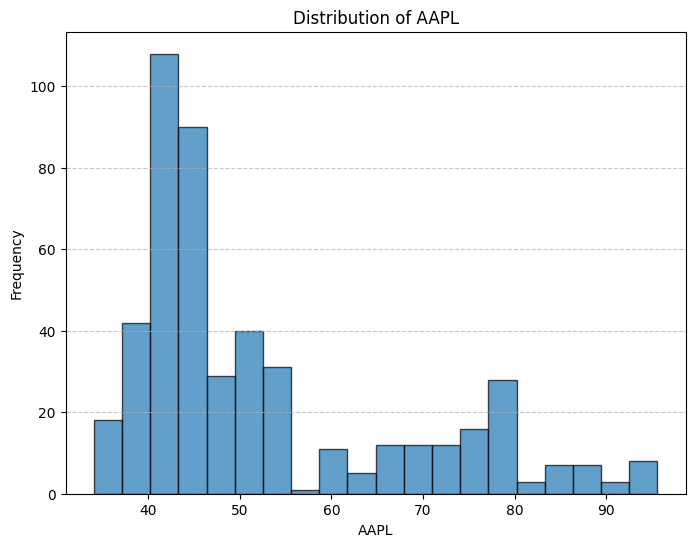

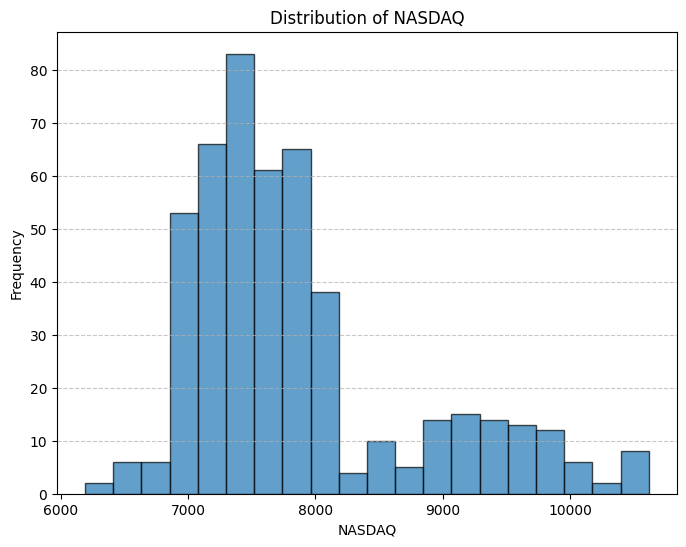

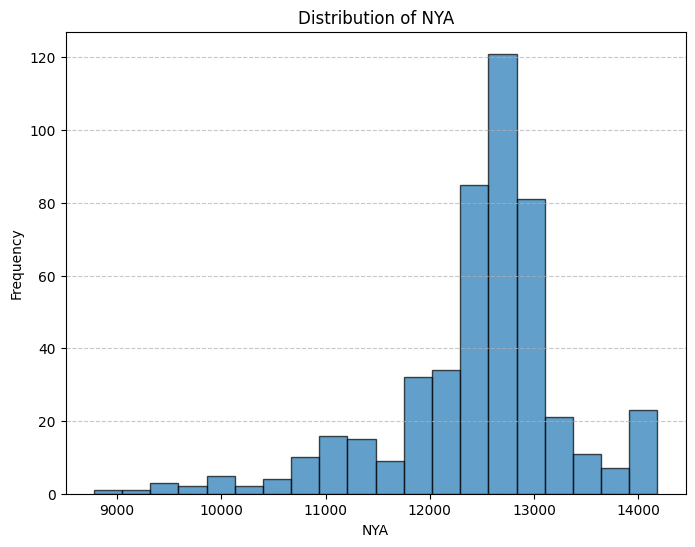

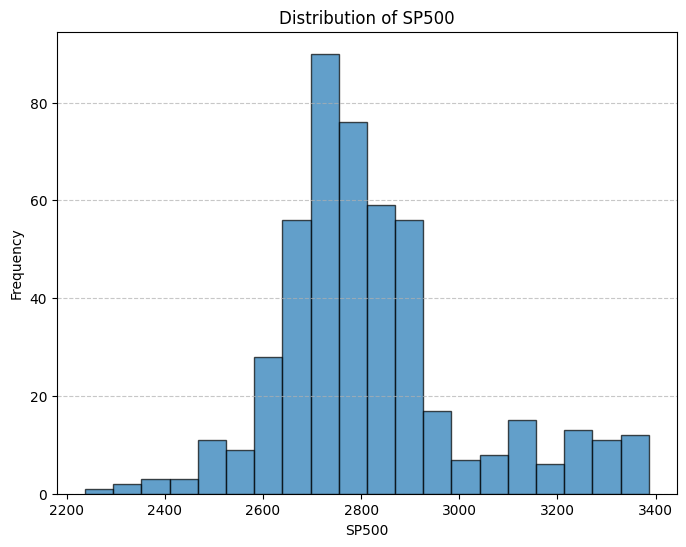

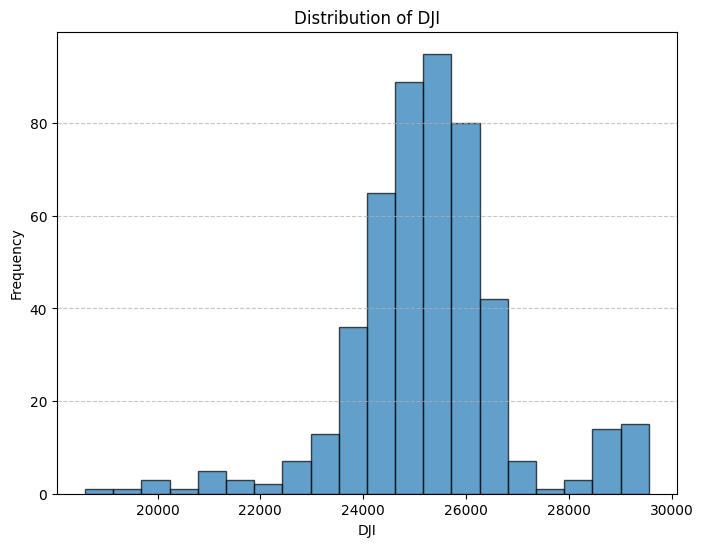

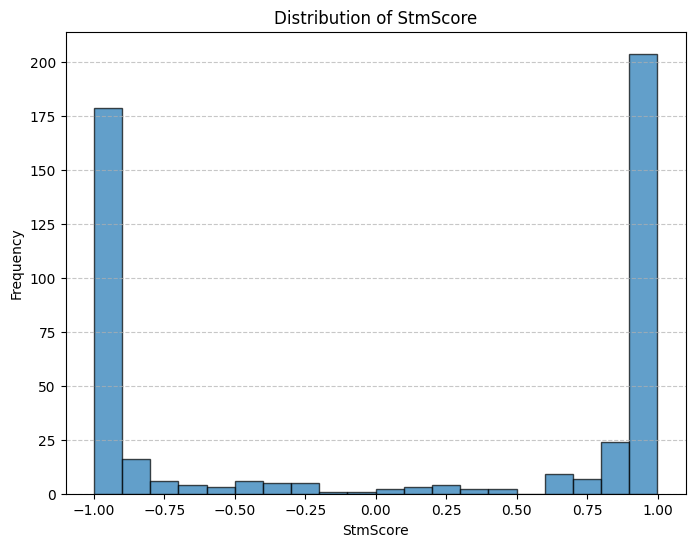

In [ ]:
# Define the columns to plot
columns_to_plot = ['AAPL', 'NASDAQ', 'NYA', 'SP500', 'DJI', 'StmScore']

# Create histograms for the specified columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    plt.hist(df[column], bins=20, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

### Summary: Describe distribution observations:

### AAPL

* Shape: Bimodal distribution with peaks around 40 and 80.
* Summary: The AAPL values show two clusters, one around 40 and another around 80, suggesting two distinct ranges of values in the dataset.

### NASDAQ

* Shape: Slightly right-skewed distribution with a primary peak between 7000 and 8000.
* Summary: The majority of the NASDAQ values fall between 7000 and 8000, but there are some higher values extending toward 10000 and beyond.

### NYA

* Shape: Right-skewed distribution with a prominent peak around 12500 to 13000.
* Summary: Most NYA values are concentrated around 12500 to 13000, with some lower values and a few higher outliers above 13500.

### SP500

* Shape: Bell-shaped with a peak between 2600 and 2800.

* Summary: The SP500 values are concentrated around 2600 to 2800, with a tail extending toward higher values, indicating a fairly symmetrical distribution.

### DJI

* Shape: Bell-shaped distribution with a peak between 24000 and 26000.
* Summary: The DJI values are mostly centered around 25000, with the distribution showing a slight tail extending toward higher values (up to 30000).

### Sentiment Scores

* Shape: Bimodal distribution with two distinct peaks around -1 and 1.
* Summary: Most of the scores cluster near -1 and 1, indicating polarization in the data, with very few scores around the center (0), this means that the headline sentiments are most likely either negative or positive.

## Correlation Analysis:

### Calculating and visualize correlations among stock indices and sentiment scores.

### Using correlation matrices for visualization.

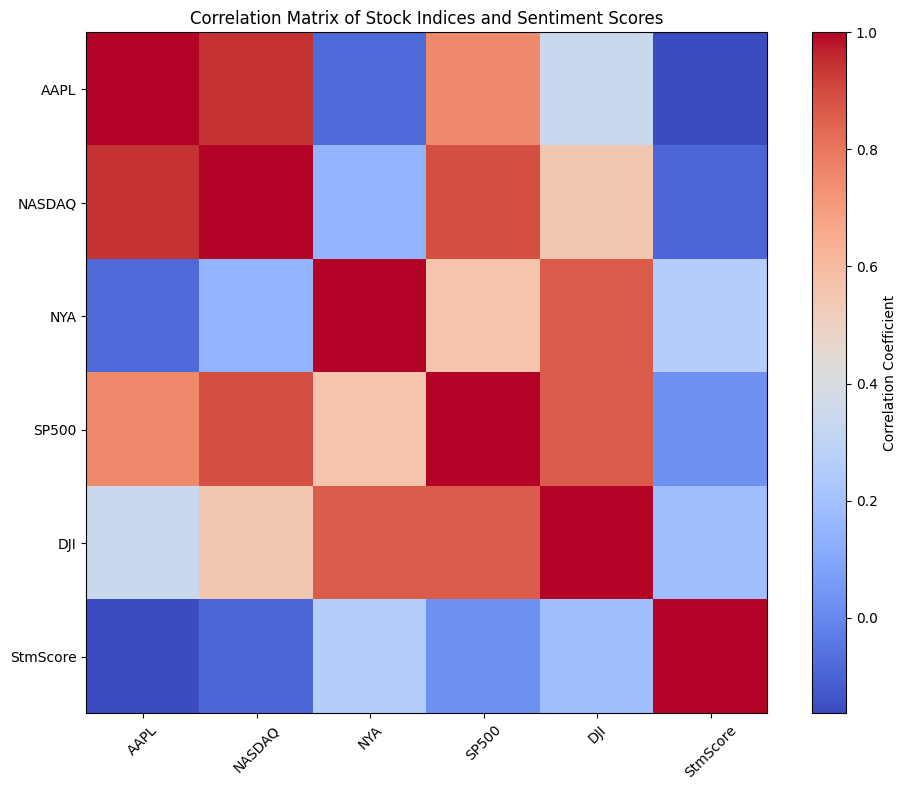

,AAPL,NASDAQ,NYA,SP500,DJI,StmScore
AAPL,1.000000,0.941846,-0.085380,0.751729,0.344752,-0.163202
NASDAQ,0.941846,1.000000,0.151450,0.887213,0.546378,-0.093781
NYA,-0.085380,0.151450,1.000000,0.562041,0.863321,0.260141
SP500,0.751729,0.887213,0.562041,1.000000,0.861979,0.031803
DJI,0.344752,0.546378,0.863321,0.861979,1.000000,0.187811
StmScore,-0.163202,-0.093781,0.260141,0.031803,0.187811,1.000000


In [ ]:
# Select stock indices and stmscore columns for correlation analysis
columns_to_analyze = ['AAPL', 'NASDAQ', 'NYA', 'SP500', 'DJI', 'StmScore']

# Calculate the correlation matrix
correlation_matrix = df[columns_to_analyze].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(columns_to_analyze)), columns_to_analyze, rotation=45)
plt.yticks(range(len(columns_to_analyze)), columns_to_analyze)
plt.title('Correlation Matrix of Stock Indices and Sentiment Scores')
plt.tight_layout()
plt.show()

# Display the correlation matrix dataframe
correlation_matrix

### Summary: Discussing correlation findings.

#### Stock Indices (AAPL, NASDAQ, NYA, SP500, DJI):

*  AAPL shows a very strong positive correlation with NASDAQ (0.94) and a strong positive correlation with SP500 (0.75). It has a moderate correlation with DJI (0.34) and a weak negative correlation with NYA (-0.09). These relationships indicate that AAPL's performance tends to align closely with technology-focused indices like NASDAQ and SP500 but diverges somewhat from broader indices like NYA.
* This makes sense because AAPL is indeed listed on the NASDAQ and is the largest non-finance company on that stock exchange.

#### StmScore:

* StmScore has an overall weak correlation with all indices. This suggests that StmScore is independent of the stock indices, and the Headline's StmScore may not be an effective measure when studying the correlation between the Headlines and stock indices.

## Trend Analysis:

### Ploting time series graphs for stock trends and sentiment scores.

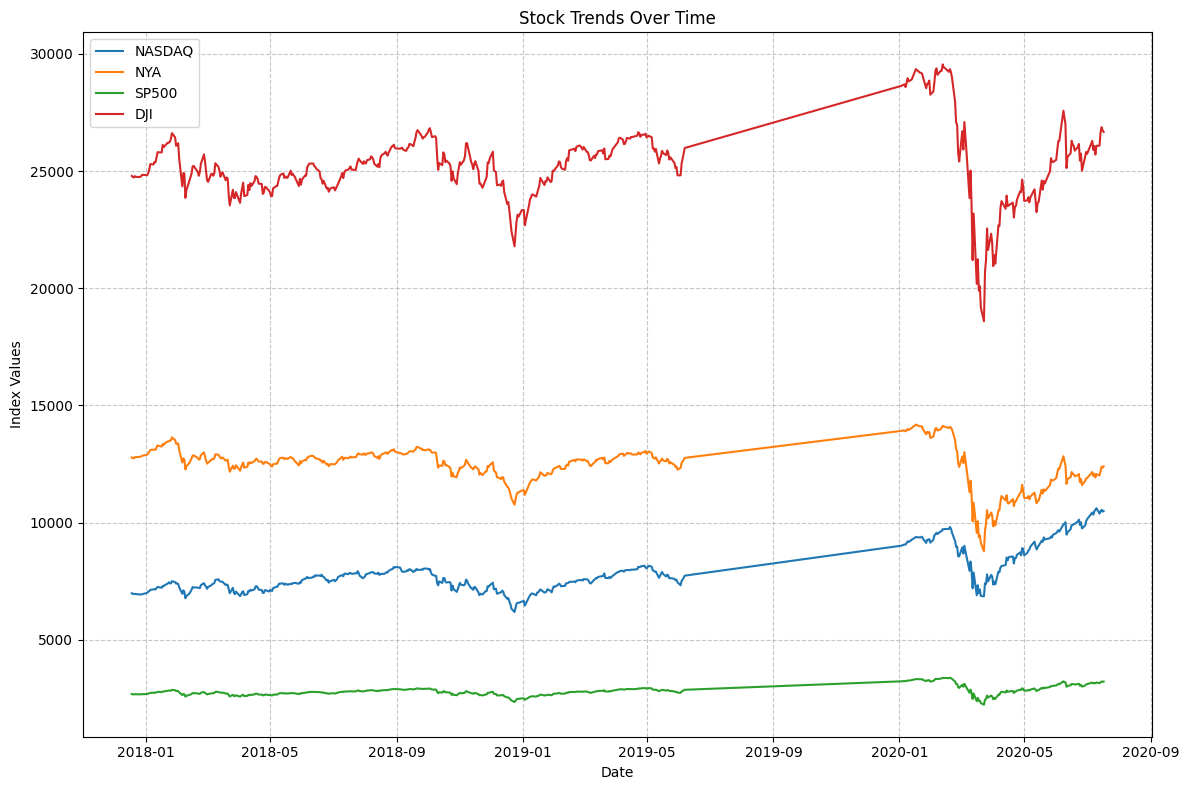

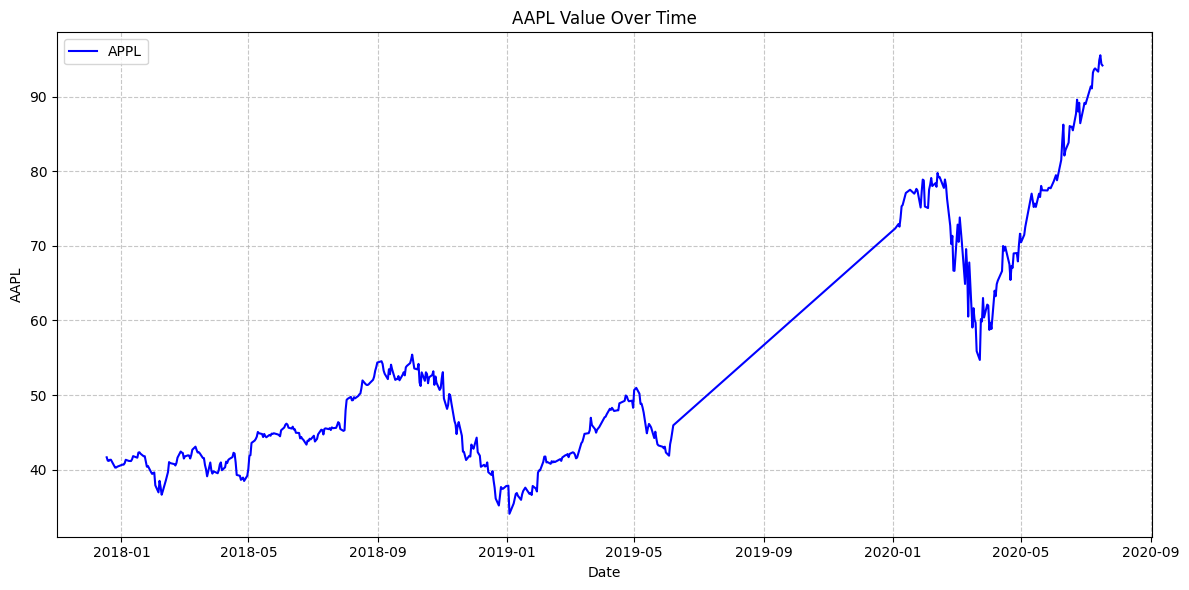

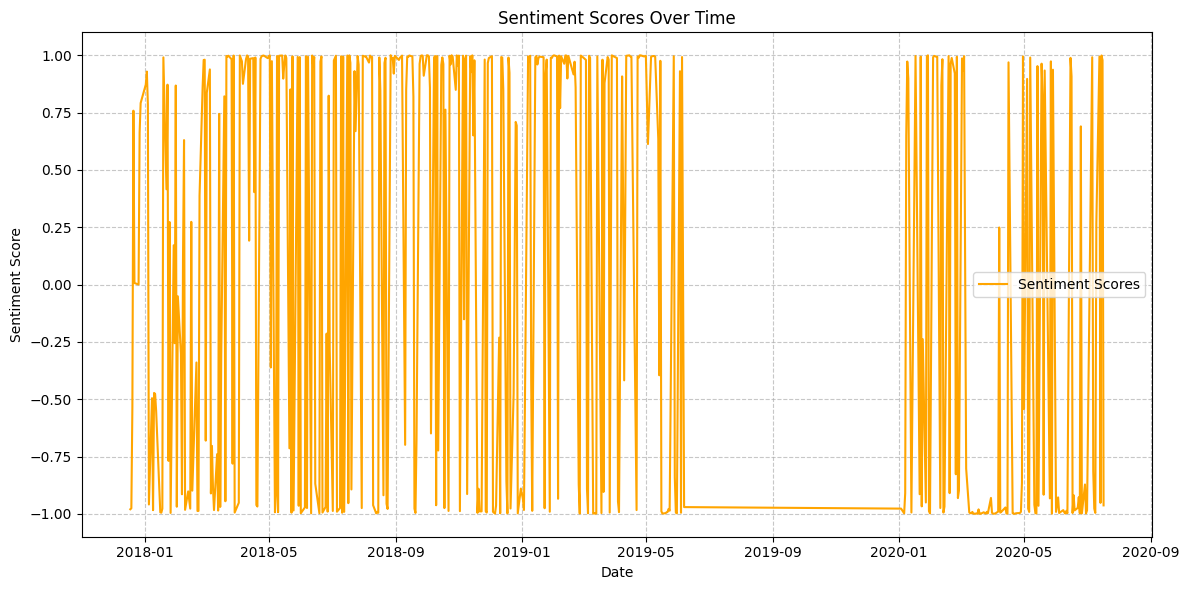

In [19]:
# Plot time series for stock trends
stock_columns = ['NASDAQ', 'NYA', 'SP500', 'DJI']
plt.figure(figsize=(12, 8))

# Iterage through columns and plot data points
for column in stock_columns:
    plt.plot(df['Date'], df[column], label=column)

# Assign Axis Titles on graph:
plt.title('Stock Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Index Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot time series for AAPL
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['AAPL'], color='blue', label='APPL')
plt.title('AAPL Value Over Time')
plt.xlabel('Date')
plt.ylabel('AAPL')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot time series for sentiment scores
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['StmScore'], color='orange', label='Sentiment Scores')
plt.title('Sentiment Scores Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Markdown Summary: Explaining trend analysis observations:

### Preface:

* There seems to be missing data points between 2019-06-07 and 2020-01-03, these data points were not available in the raw data, and are shown in the line graphs as a straight line between those two dates.

### AAPL and the Other Stock Indices:

* AAPL closely mirrors NASDAQ's movements due to its significant weight in the technology sector, which NASDAQ primarily represents.
* AAPL shows somewhat similar trends to the S&P 500 and Dow Jones Industrial Average (DJI) because these indices also include major companies across various sectors. However, their broader diversification causes slight deviations compared to NASDAQ.

### Sentiment Score:
* The sentiment score graph is very polorizing and there seems to be no apparent trend line. This may be due to the high volatility in positive and negative headlines day to day in the stock market.

## Impact on AAPL Prices:

#### Using linear regression to assess the impact of indices (NASDAQ, NYA, SP500, DJI) on AAPL stock prices.

In [ ]:
# Running all independent variables of stock indeces on AAPL

results = ols ("AAPL ~ NASDAQ + NYA + SP500 + DJI", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     2450.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          7.89e-317
Time:                        17:49:03   Log-Likelihood:                -1251.1
No. Observations:                 483   AIC:                             2512.
Df Residuals:                     478   BIC:                             2533.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.4243      2.453    -11.586      0.0

#### Checking for multicollinearity using VIF.

In [ ]:
from statsmodels.tools.tools import add_constant

# Add Constants:
vifDF = df
vifDF = add_constant(vifDF)

#Drop String Columns:
vifDF.drop(columns=['Date', 'Headline',	'Trend', 'Sentiment'], inplace=True)

#Change stmscore to float type:
vifDF['StmScore'] = vifDF['StmScore'].astype(float)

vifDF.head(3)

,const,AAPL,NASDAQ,NYA,SP500,DJI,StmScore
0,1.0,41.653164,6994.759766,12785.79980,2690.159912,24792.19922,-0.980
1,1.0,41.209293,6963.850098,12747.50000,2681.469971,24754.69922,-0.976
2,1.0,41.164425,6960.959961,12747.59961,2679.250000,24726.69922,-0.533


In [25]:
x = vifDF.drop("AAPL", axis = 1)
x

,const,NASDAQ,NYA,SP500,DJI,StmScore
0,1.0,6994.759766,12785.79980,2690.159912,24792.19922,-0.9800
1,1.0,6963.850098,12747.50000,2681.469971,24754.69922,-0.9760
2,1.0,6960.959961,12747.59961,2679.250000,24726.69922,-0.5330
3,1.0,6965.359863,12800.20020,2684.570068,24782.30078,0.7579
4,1.0,6959.959961,12797.40039,2683.340088,24754.09961,0.0065
...,...,...,...,...,...,...
478,1.0,10390.839840,12014.70020,3155.219971,26085.80078,0.9936
479,1.0,10488.580080,12204.20020,3197.520020,26642.59961,-0.9522
480,1.0,10550.490230,12391.29980,3226.560059,26870.09961,0.9985
481,1.0,10473.830080,12350.09961,3215.570068,26734.69922,0.9780


In [26]:
VIFdf = pd.DataFrame()
VIFdf["X_Variables"] = x.columns
  
VIFdf["VIF_Values"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(VIFdf)

  X_Variables  VIF_Values
0       const  285.299228
1      NASDAQ   45.593173
2         NYA    9.822824
3       SP500  108.721496
4         DJI   35.977909
5    StmScore    1.126346


* From the above data, it seems that NASDAQ, SP500, and the DJI have severe multicollinearity with each other, so I will remove 2 out of the 3 and keep the stock index wi``th the highest correlation to AAPL.
* The stock index with the highest correlation to AAPL is NASDAQ with a correlation of 0.941846.
* I will remove SP500 and DJI and rerun the VIF function to check for multicollinearity again.

In [ ]:
#Dropping SP500 and DJI:
x.drop(columns=['SP500', 'DJI'], inplace=True)
x.head(3)

,const,NASDAQ,NYA,StmScore
0,1.0,6994.759766,12785.79980,-0.980
1,1.0,6963.850098,12747.50000,-0.976
2,1.0,6960.959961,12747.59961,-0.533


In [28]:
# Checking for multicollinearity again with vif:
VIFdf = pd.DataFrame()
VIFdf["X_Variables"] = x.columns
  
VIFdf["VIF_Values"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(VIFdf)

  X_Variables  VIF_Values
0       const  274.617034
1      NASDAQ    1.043799
2         NYA    1.109717
3    StmScore    1.093884


* I will also remove NYA and StmScore as they share very low correlation with AAPL. Having low correlation with AAPL means that these independent variable will have low predictive power when used in a regression model.

In [31]:
# Running ols regression model again, but with only NASDAQ and NYA:
results = ols ("AAPL ~ NASDAQ", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     3778.
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          6.08e-230
Time:                        02:16:40   Log-Likelihood:                -1465.3
No. Observations:                 483   AIC:                             2935.
Df Residuals:                     481   BIC:                             2943.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.7776      2.018    -35.068      0.0

### Chosen Model:
* I have chosen to use the NASDAQ as the only independent variable when predicting AAPL values, as through testing for correlation and multicollinearity have shown that the NASDAQ would be the best independent variable to use in order to do so.

## Predictive Modeling:

#### Predicting AAPL stock prices with regression models; and assessing accuracy.

In [ ]:
# prepare x by droping unused columns
x.drop(columns=['const', 'NYA', 'StmScore'], inplace=True)
x.head(3)

,NASDAQ
0,6994.759766
1,6963.850098
2,6960.959961


In [ ]:
# Get Y values from main dataframe:
y = df['AAPL']
y

0      41.653164
1      41.209293
2      41.164425
3      41.320255
4      41.320255
         ...    
478    93.371246
479    94.916397
480    95.569176
481    94.393204
482    94.202499
Name: AAPL, Length: 483, dtype: float64

In [36]:
# Splitting x and y into training and testing data:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [37]:
#Printing y_test:
y_test

186    52.118702
434    70.482468
379    78.401901
71     40.964806
334    50.175861
         ...    
47     41.486351
9      40.663887
423    69.351128
227    44.766041
430    69.043922
Name: AAPL, Length: 97, dtype: float64

In [38]:
# Running the regression model on the training data:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Printing y_predict:
y_predict = model.predict(x_test)
y_predict

array([53.98544187, 64.08224703, 80.00830502, 40.29833567, 56.58698432,
       44.89607954, 40.38081517, 79.81254253, 51.64518203, 35.27483649,
       93.45499357, 63.3941302 , 44.94696532, 47.62398164, 43.89844611,
       35.63944071, 43.35660406, 43.49136742, 47.36830659, 41.57250146,
       51.51788778, 51.9283933 , 47.98873781, 46.83813551, 50.37273345,
       54.7846762 , 82.01306974, 54.42194116, 48.55828326, 38.89034869,
       52.65931135, 54.29511042, 53.25670454, 40.79396488, 48.07603463,
       49.86807746, 42.75329179, 45.51028775, 49.37649812, 84.95260715,
       40.67725506, 44.35735278, 49.15209766, 46.97989691, 51.74305568,
       75.52400372, 47.94111929, 38.62861021, 47.73524348, 38.31707248,
       73.88400278, 43.59422556, 52.85802957, 39.55030625, 47.38588905,
       50.03707115, 37.71687552, 36.93896202, 45.50779552, 71.34190181,
       51.87050948, 72.57857001, 40.18131431, 52.36815986, 31.768565  ,
       94.35739748, 50.53675026, 55.0588607 , 45.4565982 , 77.89

In [ ]:
# Printing the model score:
model.score(x_test,y_test)

0.9027654795111694

In [ ]:
# Printing the mdoel Coefficient and Intercept:
print("Model Coefficient: " , model.coef_)
print("Model Intercept: ", model.intercept_)

Model Coefficient:  [0.01556131]
Model Intercept:  -69.82204536201905


## Summary:

#### Analysis and Multicollinearity issues:

* When using VIF to detect potential multicollinearity, I found that the NASDAQ, DJI, and SP500 indices exhibited severe multicollinearity.

* To generate a more accurate model, I decided to remove two of the three variables with the highest VIF scores. To determine which indices to remove, I chose to keep the one with the highest correlation to AAPL, which was NASDAQ.

* After rerunning the VIF algorithm, the results showed that there were no longer any multicollinearity issues among the remaining variables. The only independent variables left were NASDAQ, NYA, and StmScore. Since NYA and StmScore both had very low correlation with AAPL, I chose to remove them as well.

#### Chosen Model:

* This left me with only one independent variable: NASDAQ. Therefore, the model I have chosen to best predict AAPL values includes only NASDAQ as an independent variable.

* With this model, I achieved an accuracy score of 0.9027654795111694, meaning the model was 90.2% accurate when predicting AAPL values on the testing data.

